In [ ]:
from collections import Counter
from string import punctuation

import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
display(df.head())
df.info()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [ ]:
# Перервод времени в datetime
df['created_date'] = pd.to_datetime(df['created_date'], utc=True, format="ISO8601")
df['created_date']

0         2015-09-29 10:50:41.987077+00:00
1         2015-09-29 10:50:42.870083+00:00
2         2015-09-29 10:50:45.222647+00:00
3         2015-09-29 10:50:47.601894+00:00
4         2015-09-29 10:50:48.488476+00:00
                        ...               
1804869   2017-11-11 00:55:39.265997+00:00
1804870   2017-11-11 00:55:56.634498+00:00
1804871   2017-11-11 00:59:02.840713+00:00
1804872   2017-11-11 01:01:10.153692+00:00
1804873   2017-11-11 01:01:10.822969+00:00
Name: created_date, Length: 1804874, dtype: datetime64[ns, UTC]

In [ ]:
display(df[df['comment_text'].isna()])

# Уберем строки с пропусками в полях comment_text
df.dropna(subset=['comment_text'], inplace=True)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
513346,872115,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,163140,approved,5,0,0,9,1,0.0,0,4
1010795,5353666,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,340316,approved,0,0,0,0,0,0.0,4,4
1512317,5971919,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,378393,approved,0,0,0,1,0,0.0,4,4


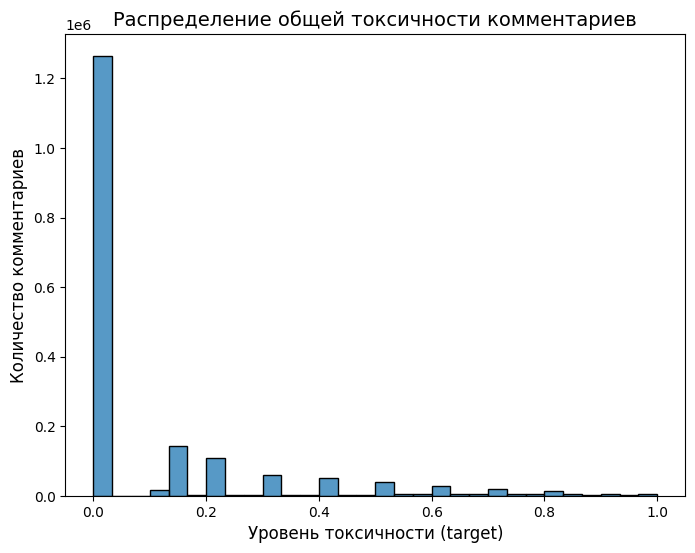

In [ ]:
# Гистограмма общей токсичности
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=30)
plt.title('Распределение общей токсичности комментариев', fontsize=14)
plt.xlabel('Уровень токсичности (target)', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.show()

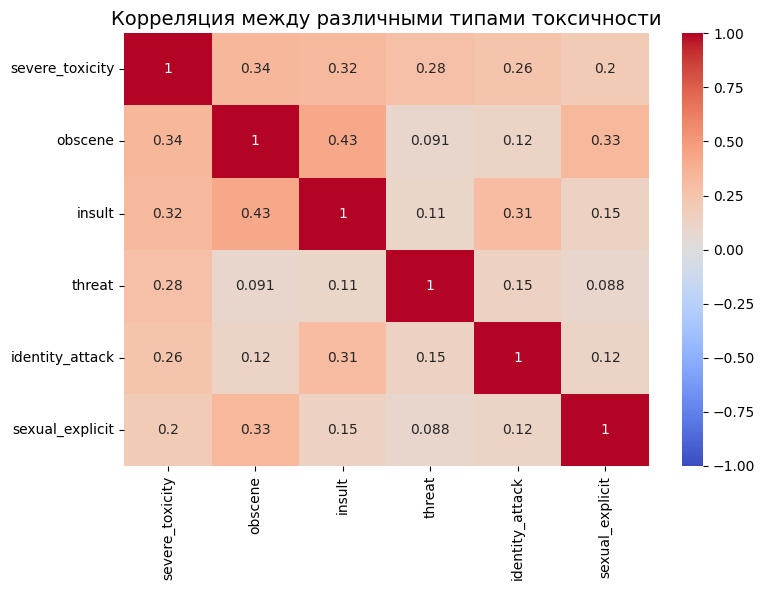

In [ ]:
# Смотрим корреляцию между различными типами токсичности
toxicity_columns = ['severe_toxicity', 'obscene', 'insult', 'threat', 'identity_attack', 'sexual_explicit']
corr_matrix = df[toxicity_columns].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция между различными типами токсичности', fontsize=14)

plt.tight_layout()
plt.show()

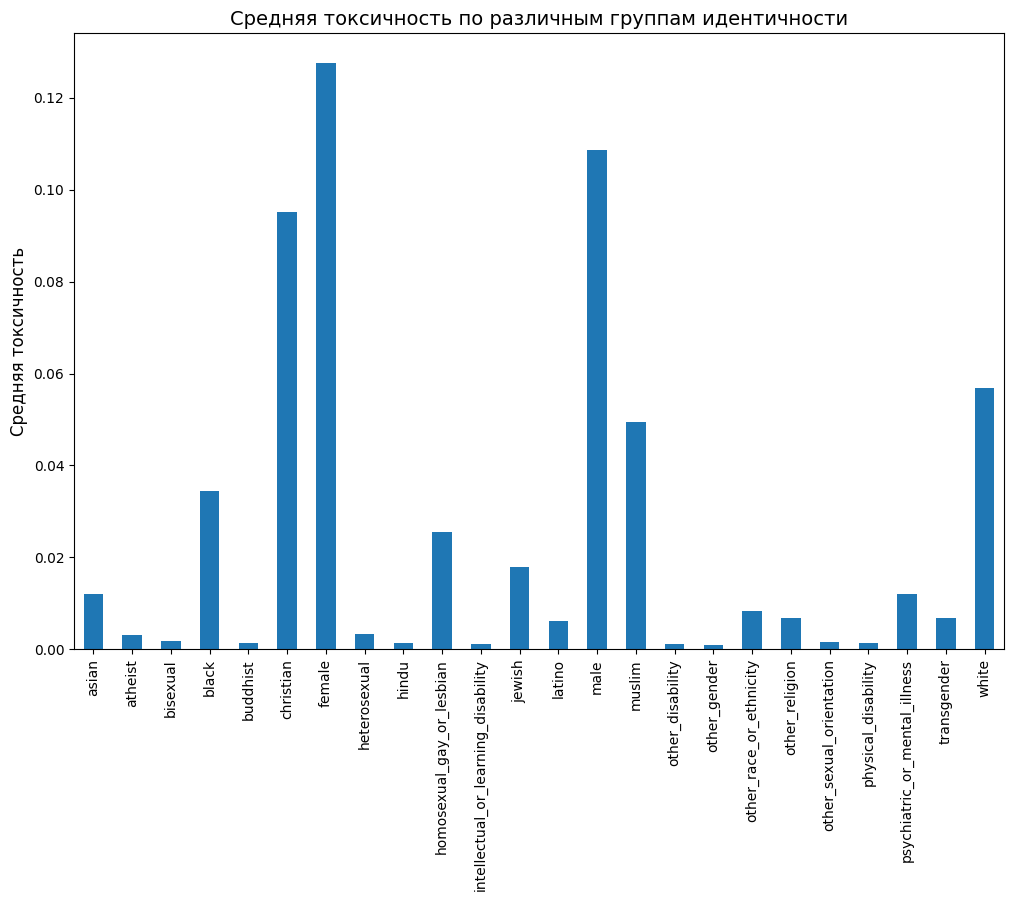

In [ ]:
# Смотрим среднюю токсичность по меткам
identity_columns = [
    'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual',
    'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish',
    'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
    'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness',
    'transgender', 'white'
]

plt.figure(figsize=(12, 8))

df[identity_columns].mean().plot(kind='bar')
plt.title('Средняя токсичность по различным группам идентичности', fontsize=14)
plt.ylabel('Средняя токсичность', fontsize=12)

plt.show()

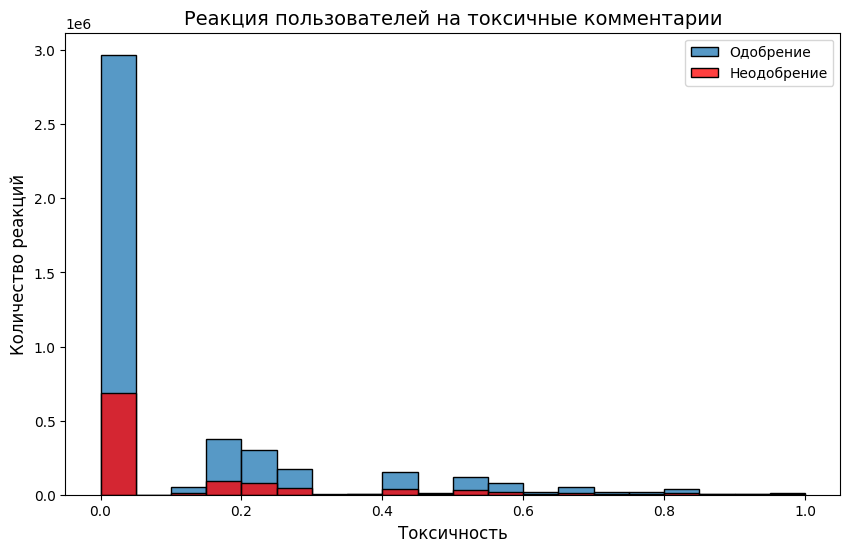

In [ ]:
# Смотрим реакцию пользователей на токсичные и не очень комментарии
plt.figure(figsize=(10, 6))
sns.histplot(df, x='target', weights='likes', bins=20, label='Одобрение')
sns.histplot(df, x='target', weights='disagree', bins=20, color='red', label='Неодобрение')
plt.title('Реакция пользователей на токсичные комментарии', fontsize=14)
plt.xlabel('Токсичность', fontsize=12)
plt.ylabel('Количество реакций', fontsize=12)
plt.legend()
plt.show()

In [ ]:
nltk.download("stopwords", quiet=True)

# Токенизация и удаление пунктуации
tw = TweetTokenizer()
punctuation_list = list(punctuation) + ['...']
df['tokens'] = df['comment_text'].apply(lambda x: [word for word in tw.tokenize(x.lower()) if word not in punctuation_list])

In [ ]:
# Стобец с токенами без стоп-слов
stopwords = stopwords.words('english')
df['without_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopwords])

In [ ]:
df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,tokens,without_stopwords
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[this, is, so, cool, it's, like, would, you, w...","[cool, like, would, want, mother, read, really..."
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[thank, you, this, would, make, my, life, a, l...","[thank, would, make, life, lot, less, anxiety-..."
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[this, is, such, an, urgent, design, problem, ...","[urgent, design, problem, kudos, taking, impre..."
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[is, this, something, i'll, be, able, to, inst...","[something, i'll, able, install, site, releasing]"
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,0,0,0,1,0,0.0,4,47,"[haha, you, guys, are, a, bunch, of, losers]","[haha, guys, bunch, losers]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[maybe, the, tax, on, things, would, be, colle...","[maybe, tax, things, would, collected, product..."
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[what, do, you, call, people, who, still, thin...","[call, people, still, think, divine, role, cre..."
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,4,"[thank, you, right, or, wrong, i, am, followin...","[thank, right, wrong, following, advice]"
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,0,0,0,0,0,0.0,0,66,"[anyone, who, is, quoted, as, having, the, fol...","[anyone, quoted, following, exchange, even, ap..."


In [ ]:
# Частота слов, не считая стоп-слов
all_tokens = [token for sublist in df['without_stopwords'] for token in sublist]
word_cnt = Counter(all_tokens)

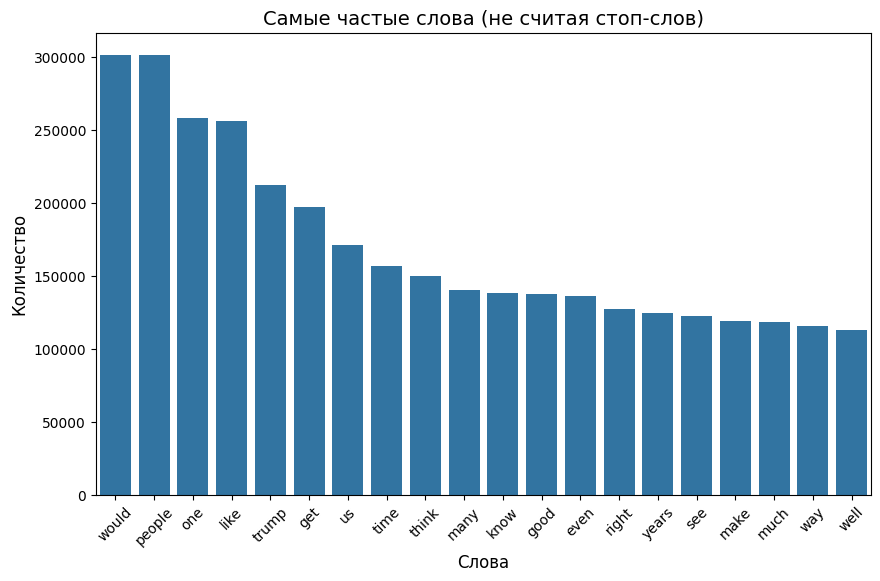

In [ ]:
# Самые часто встречающиеся слова, не считая стоп-слов
most_common_words = word_cnt.most_common(20)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=[word for word, _ in most_common_words],
    y=[count for _, count in most_common_words]
)
plt.title('Самые частые слова (не считая стоп-слов)', fontsize=14)
plt.xlabel('Слова', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Подсчет количества всех токенов в коммнетарии
df['tokens_cnt'] = df['tokens'].apply(len)
df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,tokens,without_stopwords,tokens_cnt
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[this, is, so, cool, it's, like, would, you, w...","[cool, like, would, want, mother, read, really...",19
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[thank, you, this, would, make, my, life, a, l...","[thank, would, make, life, lot, less, anxiety-...",22
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[this, is, such, an, urgent, design, problem, ...","[urgent, design, problem, kudos, taking, impre...",16
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[is, this, something, i'll, be, able, to, inst...","[something, i'll, able, install, site, releasing]",17
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,0,0,1,0,0.0,4,47,"[haha, you, guys, are, a, bunch, of, losers]","[haha, guys, bunch, losers]",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[maybe, the, tax, on, things, would, be, colle...","[maybe, tax, things, would, collected, product...",37
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[what, do, you, call, people, who, still, thin...","[call, people, still, think, divine, role, cre...",15
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,0,0,0,0,0.0,0,4,"[thank, you, right, or, wrong, i, am, followin...","[thank, right, wrong, following, advice]",10
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,0,0,0,0,0.0,0,66,"[anyone, who, is, quoted, as, having, the, fol...","[anyone, quoted, following, exchange, even, ap...",62


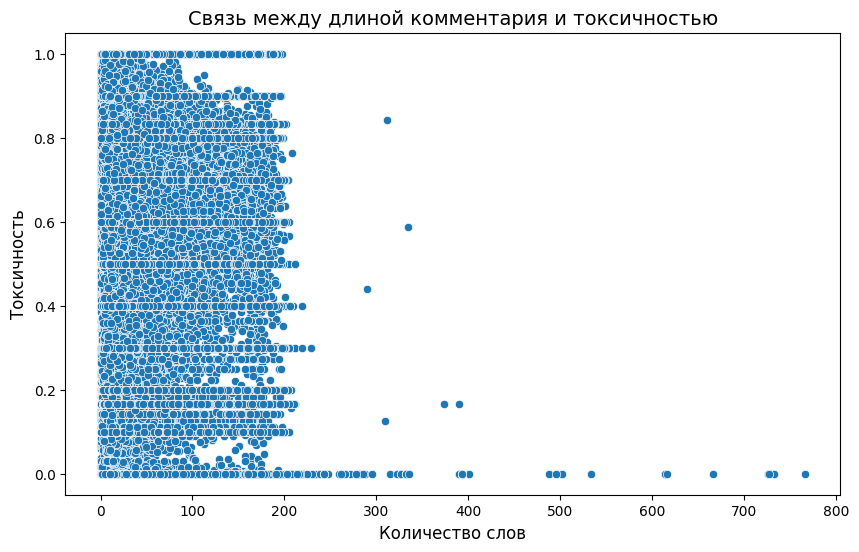

In [ ]:
# График разброса длины комментариев и токсичности
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tokens_cnt', y='target', data=df)
plt.title('Связь между длиной комментария и токсичностью', fontsize=14)
plt.xlabel('Количество слов', fontsize=12)
plt.ylabel('Токсичность', fontsize=12)
plt.show()

In [ ]:
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

# Частота частей речи без учета стоп-слов
all_pos = []
for tokens in df['without_stopwords']:
    pos_tags = nltk.pos_tag(tokens, lang='eng')
    pos = [tag for _, tag in pos_tags]
    all_pos.extend(pos)

pos_cnt = Counter(all_pos)

In [ ]:
pos_cnt

Counter({'NN': 16355650,
         'JJ': 9192640,
         'NNS': 5872764,
         'RB': 3188414,
         'VBP': 2713851,
         'VBG': 2086324,
         'VBD': 1878879,
         'VB': 1459430,
         'CD': 1282615,
         'VBN': 1120890,
         'IN': 898656,
         'VBZ': 883453,
         'MD': 602617,
         'JJR': 196861,
         'NNP': 194677,
         'PRP': 180925,
         'JJS': 164906,
         'DT': 161465,
         'RBR': 116030,
         'FW': 49880,
         'CC': 48863,
         'RP': 44396,
         'WDT': 20767,
         'UH': 17372,
         'WP$': 9953,
         'RBS': 9331,
         '$': 8029,
         'WRB': 7293,
         'NNPS': 6716,
         'WP': 5338,
         'PRP$': 942,
         'POS': 702,
         'EX': 463,
         'SYM': 432,
         'TO': 251,
         "''": 212,
         'PDT': 206,
         '``': 10,
         'LS': 3})

In [ ]:
# Переводим теги на человеческий

pos_tags_dict = {
    'NN': 'существительное, ед. число',
    'JJ': 'прилагательное',
    'NNS': 'существительное, мн. число',
    'RB': 'наречие',
    'VBP': 'глагол, настоящее время, не 3-е лицо, ед. ч.',
    'VBG': 'причастие настоящего времени',
    'VBD': 'глагол, прошедшее время',
    'VB': 'инфинитив',
    'CD': 'числительное',
    'VBN': 'причастие прошедшего времени',
    'IN': 'предлог или подчинительный союз',
    'VBZ': 'глагол, настоящее время, 3-е лицо, ед. ч.',
    'MD': 'модальный глагол',
    'JJR': 'прилагательное, сравнительная степень',
    'NNP': 'имя собственное, единственное число',
    'PRP': 'личное местоимение',
    'JJS': 'прилагательное, превосходная степень',
    'DT': 'определяющее слово (артикль, указательное местоимение)',
    'RBR': 'наречие, сравнительная степень',
    'FW': 'иноязычное слово',
    'CC': 'сочинительный союз',
    'RP': 'частица',
    'WDT': 'вопросительное определяющее слово',
    'UH': 'междометие',
    'WP$': 'вопросительное притяжательное местоимение',
    'RBS': 'наречие, превосходная степень',
    '$': 'знак доллара',
    'WRB': 'вопросительное наречие',
    'NNPS': 'имя собственное, множественное число',
    'WP': 'вопросительное местоимение',
    'PRP$': 'притяжательное местоимение',
    'POS': 'притяжательный падеж',
    'EX': 'указатель наличия',
    'SYM': 'символ',
    'TO': 'предлог "to"',
    "''": 'закрывающая кавычка',
    '``': 'открывающая кавычка',
    'PDT': 'предопределяющее слово',
    'LS': 'маркер списка'
}

translated_counter = Counter({pos_tags_dict.get(tag, tag): count for tag, count in pos_cnt.items()})

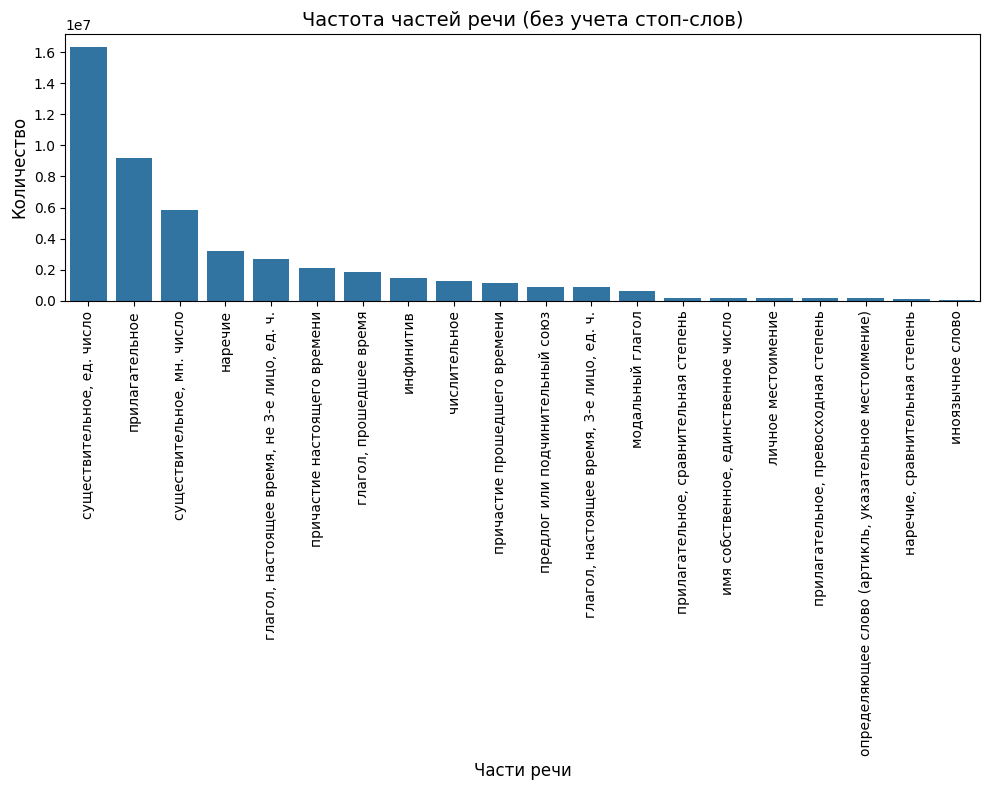

In [ ]:
# График частоты частей речи без учета стоп-слов
most_common_pos = translated_counter.most_common(20)
plt.figure(figsize=(10, 8))
sns.barplot(
    x=[pos for pos, _ in most_common_pos],
    y=[count for _, count in most_common_pos]
)
plt.title('Частота частей речи (без учета стоп-слов)', fontsize=14)
plt.xlabel('Части речи', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()